In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Read the CSV file generated by the app

filename = 'Recco Recording 8.csv'
df = pd.read_csv(filename)
df.interpolate(limit_direction='both', inplace=True)
df

,timestamp,CompassSensor,DecibelSource
0,1613944587690,6.067480,65.463348
1,1613944587727,6.067480,65.386326
2,1613944587730,6.436288,65.309304
3,1613944587747,6.805095,64.493300
4,1613944587770,6.504224,63.677296
...,...,...,...
5473,1613944696899,2.349864,62.237437
5474,1613944696911,2.635488,63.905927
5475,1613944696951,2.921111,59.753375
5476,1613944696955,3.206734,59.753375


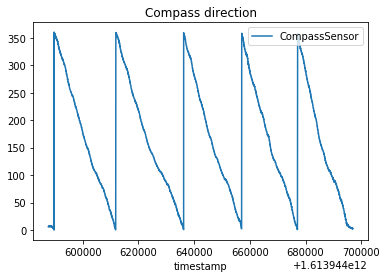

In [8]:
df.plot('timestamp', 'CompassSensor', title='Compass direction').get_figure().savefig("compass.pdf")

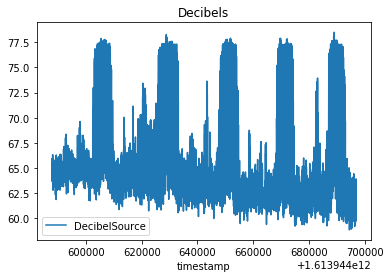

In [9]:
df.plot('timestamp', 'DecibelSource', title='Decibels').get_figure().savefig("decibels.pdf")

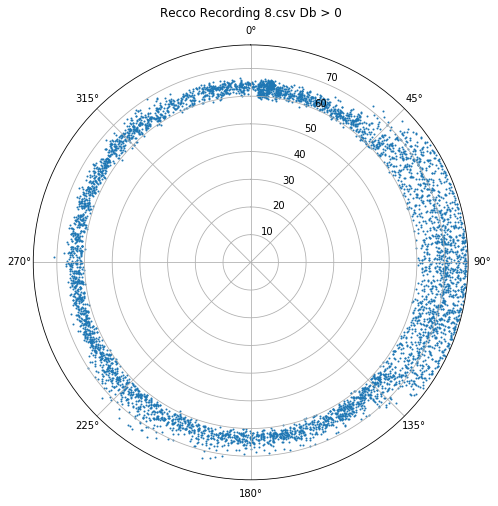

In [10]:
def polarplot(df, filename, fig_name, minDb=0):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='polar')
    
    # The following 2 lines convert the normal polar plot to a compass plot
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    
    ax.set_ylim(minDb, df.DecibelSource.max())    
    c = ax.scatter(np.radians(df.CompassSensor), df.DecibelSource, s=1)
    plt.title(f'{filename} Db > {minDb}')
    fig.savefig(fig_name)
    
polarplot(df, filename, 'polar0.pdf')

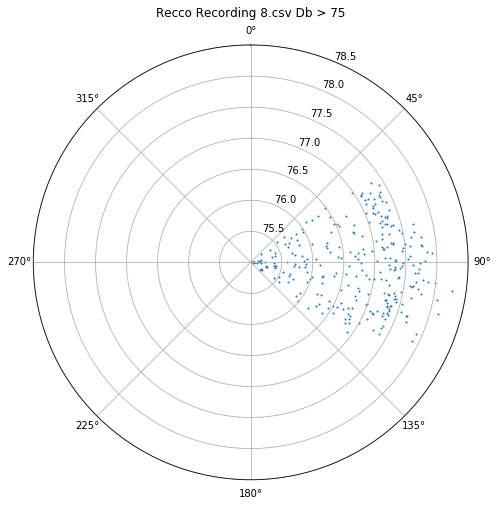

In [11]:
polarplot(df, filename, 'polar75.pdf', 75)